# <h1 style="color: green;">Iris Dataset</h1>              

**In this project,i have implemented Decision tree algorithms on Iris dataset.The objective of this project is to classify the flower belong to which category among all three**

> **The Iris dataset is a commonly used dataset in machine learning for classification tasks. It contains measurements of iris flowers, such as sepal length, sepal width, petal length, and petal width. This dataset is often employed for building and evaluating machine learning models to classify iris flowers into one of three species: setosa, versicolor, or virginica. Its simplicity, balanced nature, and well-defined classes make it an ideal starting point for practicing and demonstrating classification algorithms in machine learning.**

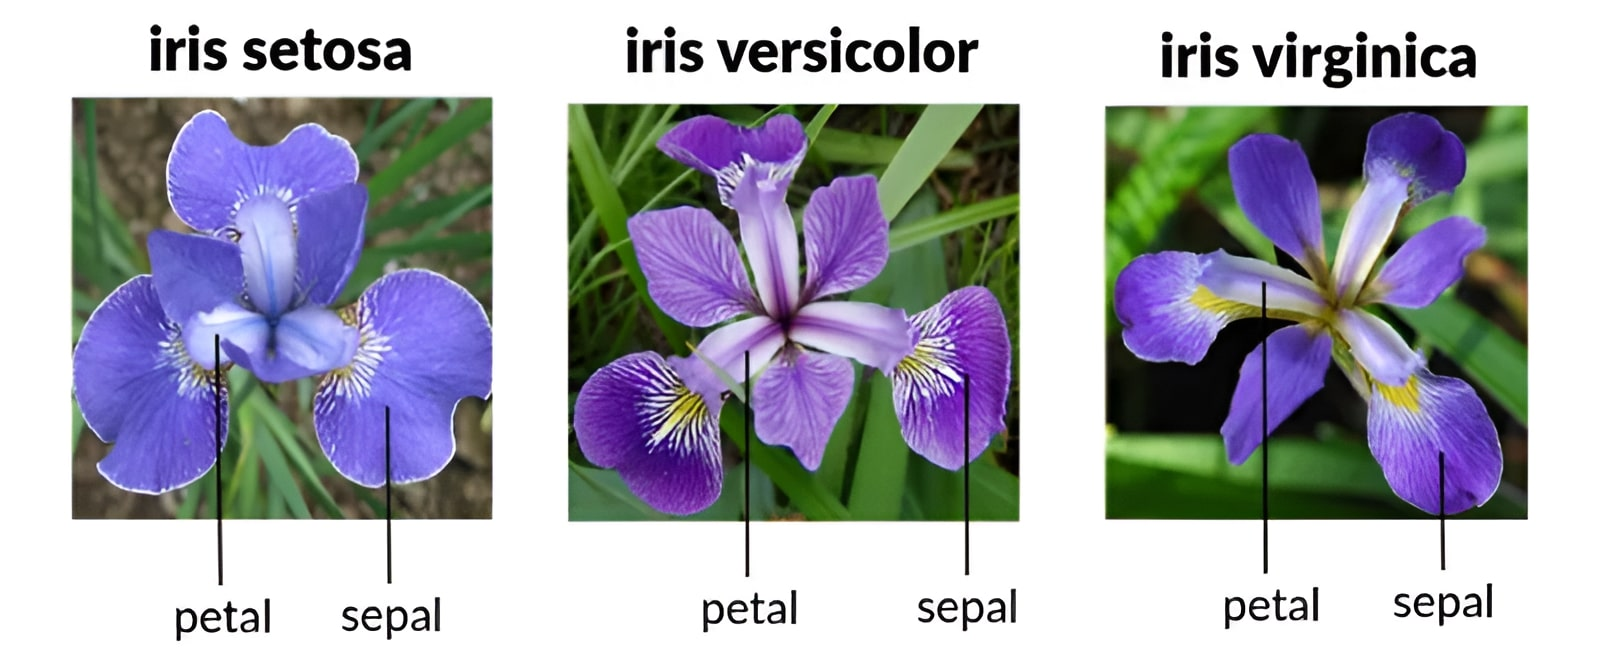

In [1]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='iris.jpg',height=1300,width=900))

### Content

The dataset contains five attributes Petal Length,Petal Width,Sepal Length,Sepal Width,Species

## Importing modules

In [2]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df=pd.read_csv(r'C:\Users\jhonn\Downloads\sinsagar program\Iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data preprocessing

In [4]:
df.head()
#first 5 values

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()
#last 5 values

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape
#total rows and columns

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.dtypes
#except species column all other columns have numerical value

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Checking null values

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# df.drop(['Id'],axis=1,inplace=True)

## Data visualisation

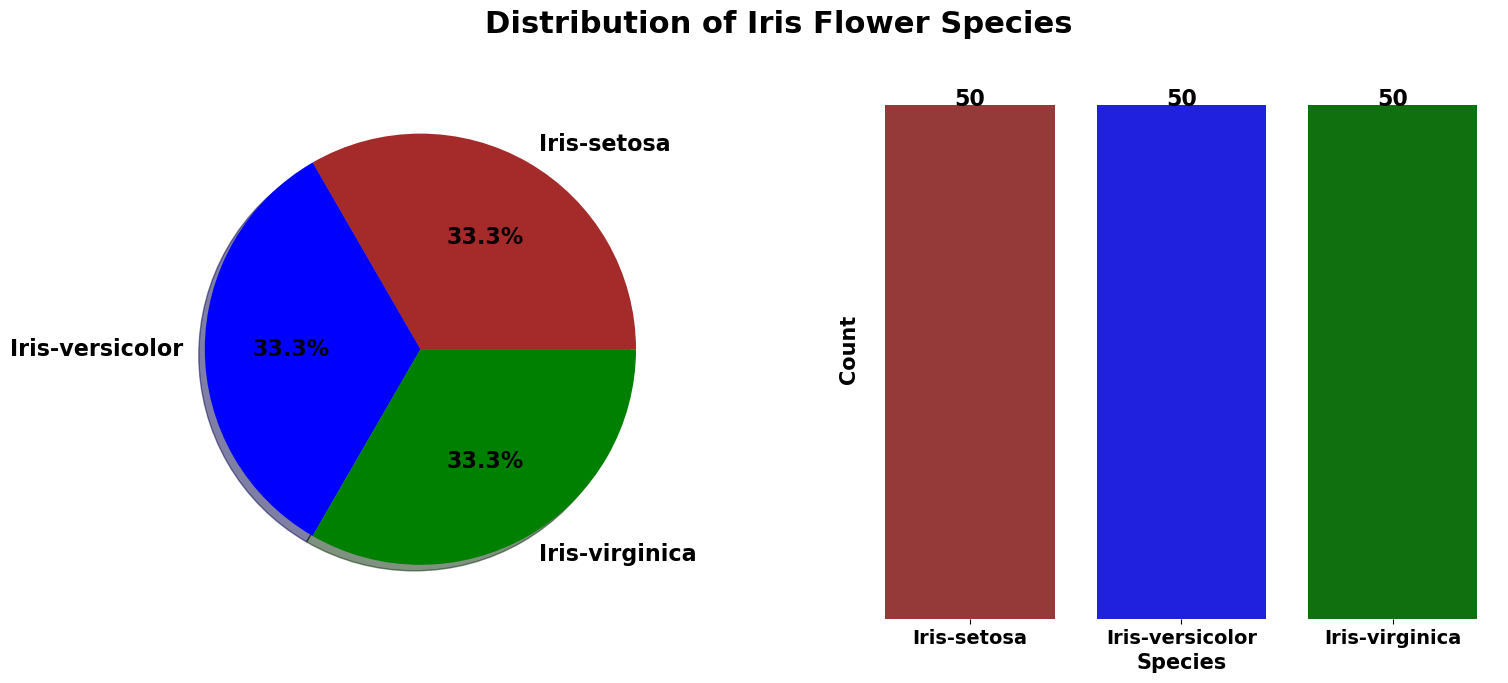

In [13]:
plt.figure(figsize=(18, 7))
plt.suptitle('Distribution of Iris Flower Species', weight='bold', fontsize=22)

label_count = df['species'].value_counts().values
label = df['species'].value_counts().index

plt.subplot(1, 2, 1)
colors = ['brown', 'blue', 'green']
plt.pie(x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1, colors=colors, textprops={'fontsize': 16, 'weight': 'bold'})

plt.subplot(1, 2, 2)
colors = ['brown', 'blue', 'green']
ax = sns.countplot(x=df['species'], palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=16, weight='bold', ha='center')
plt.xticks(fontsize=14, weight='bold')
plt.yticks([])
plt.ylabel('Count', fontsize=15, weight='bold')
plt.xlabel('Species', fontsize=15, weight='bold')

sns.despine(left=True, bottom=True)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

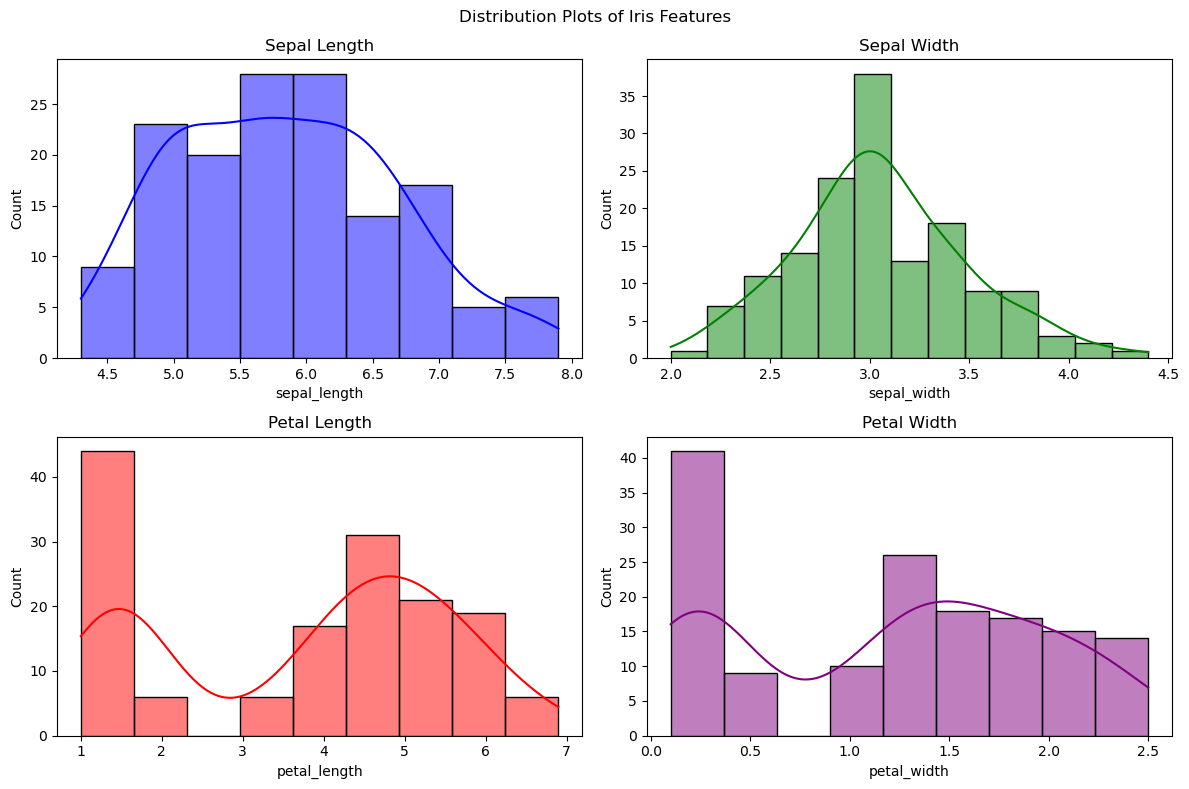

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution Plots of Iris Features')

sns.histplot(df['sepal_length'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')


sns.histplot(df['sepal_width'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')


sns.histplot(df['petal_length'], kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')


sns.histplot(df['petal_width'], kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

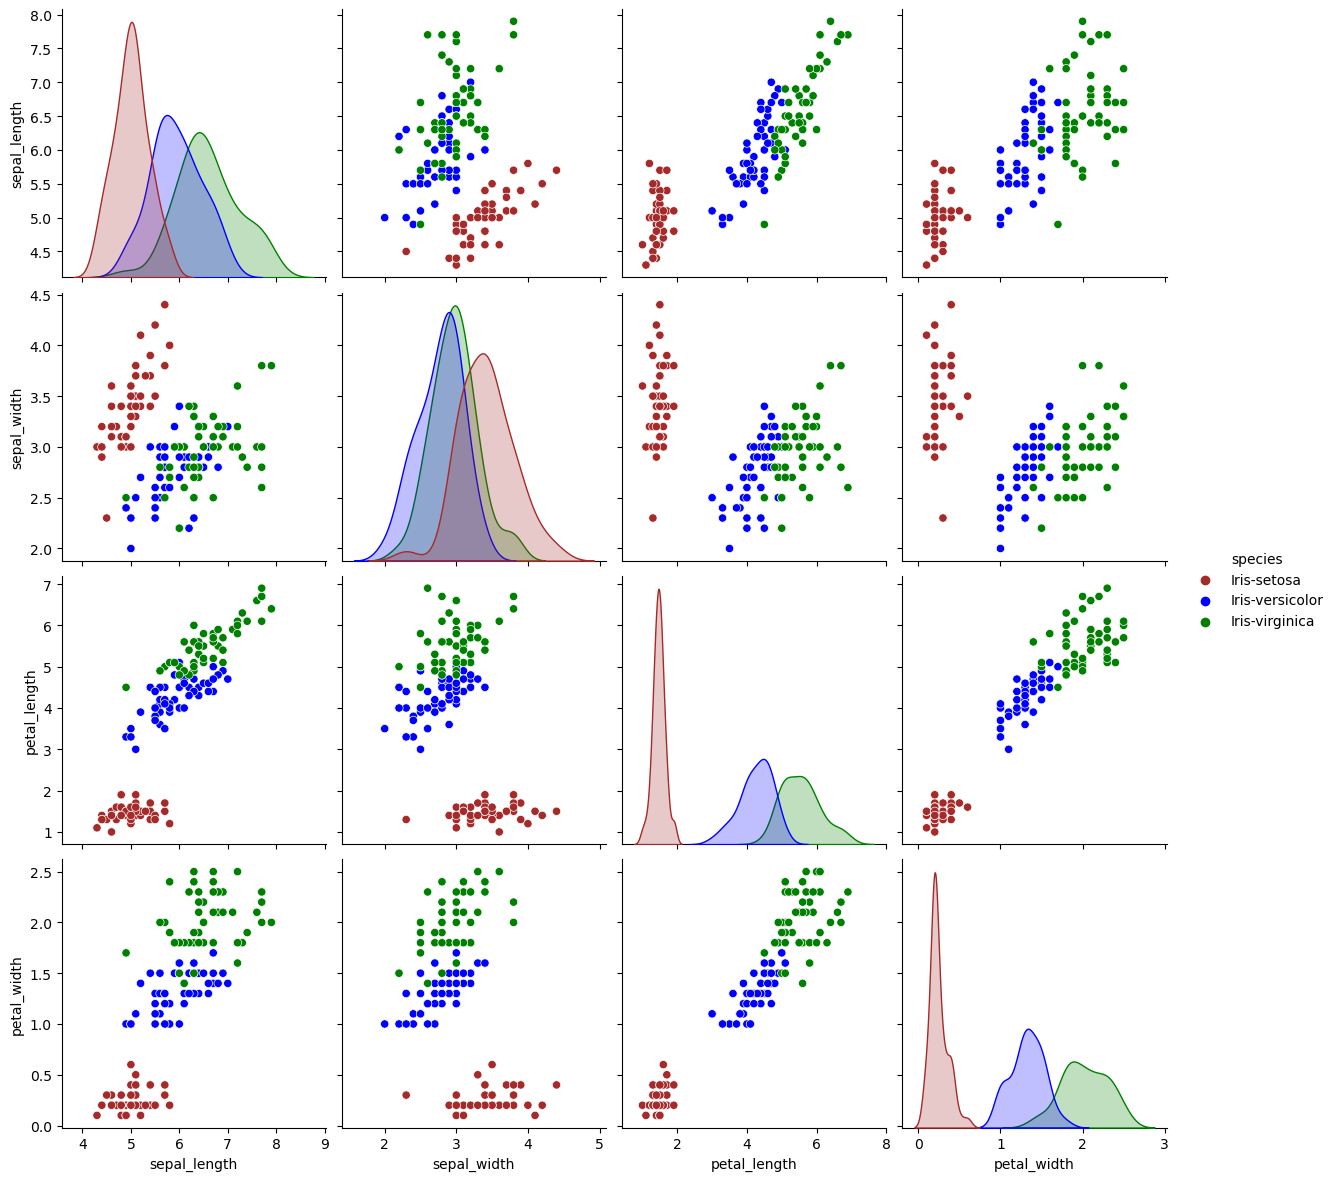

In [15]:
custom_palette = {'setosa': 'brown', 'versicolor': 'blue', 'virginica': 'green'}
sns.set_palette(list(custom_palette.values()))
sns.pairplot(data=df, hue='species', height=3)
plt.show()

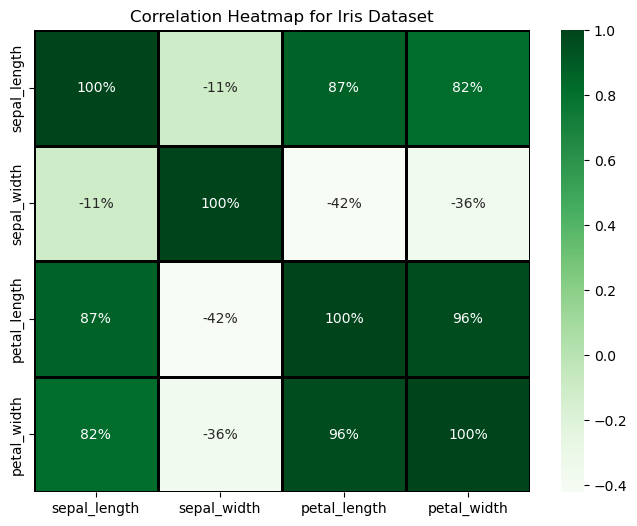

In [17]:
correlation_matrix = df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens',linecolor='black',linewidth=1,fmt=".0%")
plt.title('Correlation Heatmap for Iris Dataset')
plt.show()

#### Separating X and Y

In [18]:
x=df.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y=df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Model Selection

Train Test Split:
Evaluate the performance of a model on unseen data. It involves dividing the dataset into two separate sets: the training set and the test set.

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)
#training-70% testing-30%

Random state-Setting random state to 42 ensures reproducibility and consistent results in machine learning algorithms that involve randomness.

In [21]:
xtrain

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [22]:
xtest

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [23]:
ytrain

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
      

In [24]:
ytest

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

## Scaling/Normalisation

In [25]:
from sklearn.preprocessing import StandardScaler
var=StandardScaler()
var.fit(xtrain)
xtrain=var.transform(xtrain)
xtest=var.transform(xtest)
#used to transform the variables of a dataset to a common scale or range.
#Scaling ensures that all features have the same scale,while normalization specifically scales values to a range between 0 & 1. 

In [26]:
xtrain

array([[-0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [ 0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [-0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.89573553,  1.92563026, -1.15167541, -1.13167953],
       [-1.01631531, -2.43298195, -0.21698232, -0.32149987],
       [ 0.55122187, -0.73796609,  0.60087413,  0.75873969],
       [-1.25747488,  0.

In [27]:
xtest

array([[ 0.3100623 , -0.49582097,  0.48403749, -0.05143998],
       [-0.17225683,  1.92563026, -1.26851205, -1.26670948],
       [ 2.23933883, -0.98011121,  1.76924049,  1.43388941],
       [ 0.18948252, -0.25367584,  0.36720086,  0.35364985],
       [ 1.15412078, -0.49582097,  0.54245581,  0.21861991],
       [-0.53399618,  0.95704977, -1.38534869, -1.13167953],
       [-0.29283662, -0.25367584, -0.15856401,  0.08358997],
       [ 1.27470056,  0.2306144 ,  0.71771076,  1.43388941],
       [ 0.43064208, -1.9486917 ,  0.36720086,  0.35364985],
       [-0.05167705, -0.73796609,  0.01669095, -0.05143998],
       [ 0.79238143,  0.47275953,  0.71771076,  1.02879957],
       [-1.25747488, -0.01153072, -1.443767  , -1.53676936],
       [-0.4134164 ,  1.19919489, -1.50218532, -1.40173942],
       [-1.1368951 ,  0.2306144 , -1.38534869, -1.53676936],
       [-0.89573553,  1.92563026, -1.38534869, -1.26670948],
       [ 0.55122187,  0.71490465,  0.48403749,  0.4886798 ],
       [ 0.79238143, -0.

##  Algorithms

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
#creating object
dec=DecisionTreeClassifier()
dec.fit(xtrain,ytrain)
#predicting using the test data
ypred=dec.predict(xtest)
ypred
accuracy = accuracy_score(ytest, ypred)
print("Decision Tree Accuracy:", accuracy)

print(classification_report(ytest,ypred))

Decision Tree Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## Sample Prediction

In [29]:
print(dec.predict([[5.2,3.4,1.3,0.1]]))

['Iris-virginica']


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain, ytrain)
ypred = rf_classifier.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("RANDOM FOREST Accuracy:", accuracy)

print(classification_report(ytest,ypred))

RANDOM FOREST Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Confusion Matrix

 A confusion matrix is an N X N matrix that is used to evaluate the performance of a classification model, where N is the number of target classes. It compares the actual target values against the ones predicted by the ML model.

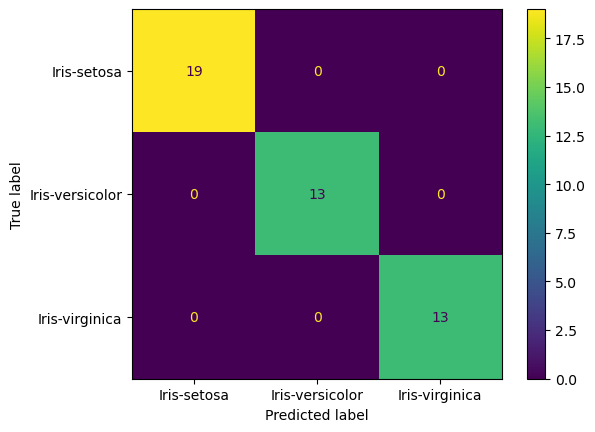

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']
result=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

[Text(0.5, 0.9166666666666666, 'PetalWidthCm <= -0.592\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = iris-virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = iris-versicolor'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 0.691\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = iris-virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 0.63\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]\nclass = iris-virginica'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 0.489\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = iris-virginica'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = iris-virginica'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = iris-setosa'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 0.421\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = iris-setosa

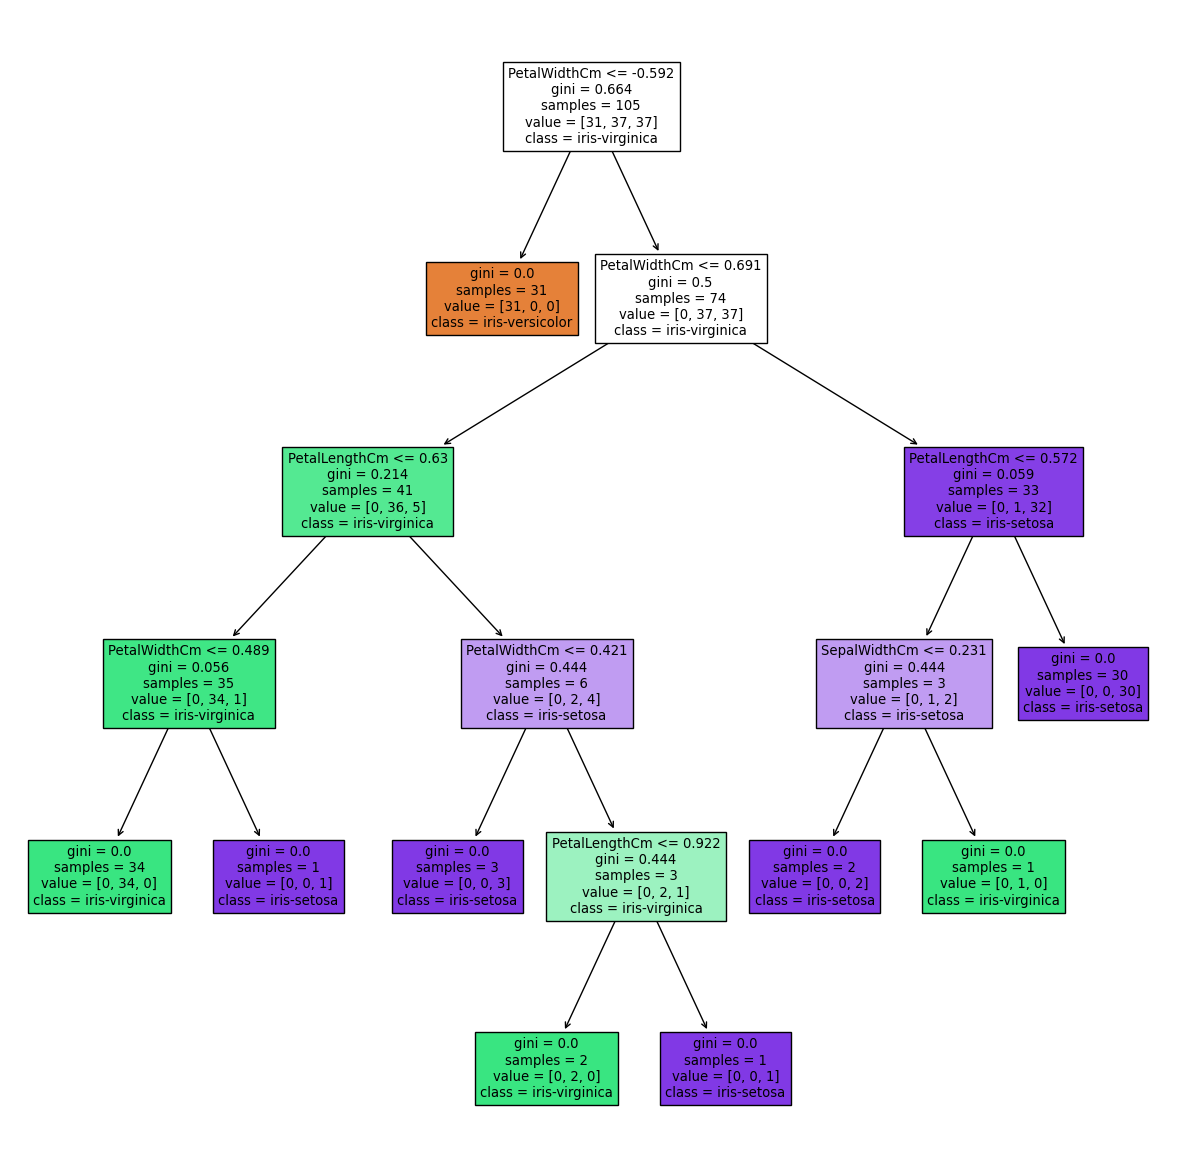

In [29]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dec,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['iris-versicolor','iris-virginica','iris-setosa'],filled=True)

In [30]:
dec.score(xtrain,ytrain)

1.0

In [31]:
dec.score(xtest,ytest)

1.0